# Business understanding

## train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
`sample_submission.csv` - A submission file in the correct format.

`PassengerId` - Id for each passenger in the test set.

`Transported` - The target. For each passenger, predict either True or False.

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

# Sklearn

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Preprocessing

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
data.shape

(8693, 14)

In [8]:
# D-type of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
# Description about the dataset
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
# Checking null values in the dataset
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
# Columns in the dataset
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [12]:
# checking the unique values in the column
for col in data.columns:
    unique = len(data[col].unique())
    print(f'{col}: {unique}')

PassengerId: 8693
HomePlanet: 4
CryoSleep: 3
Cabin: 6561
Destination: 4
Age: 81
VIP: 3
RoomService: 1274
FoodCourt: 1508
ShoppingMall: 1116
Spa: 1328
VRDeck: 1307
Name: 8474
Transported: 2


In [13]:
for col in data.columns:
    unique = data[col].unique()
    print(f'{col}: {unique}')

PassengerId: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet: ['Europa' 'Earth' 'Mars' nan]
CryoSleep: [False True nan]
Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age: [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP: [False True nan]
RoomService: [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt: [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall: [   0.   25.  371. ... 1085.  510. 1872.]
Spa: [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck: [   0.   44.   49. ... 1164.  971. 3235.]
Name: ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Props

# Data preprocessing 

In [14]:
data['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [15]:
data['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

In [16]:
data_new = data.dropna(subset=['HomePlanet','CryoSleep','Destination','Age','VIP'])

In [17]:
data_new.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           174
Destination       0
Age               0
VIP               0
RoomService     165
FoodCourt       165
ShoppingMall    181
Spa             170
VRDeck          175
Name            175
Transported       0
dtype: int64

In [18]:
data_new['Spa'].unique()

array([   0.,  549., 6715., ..., 2868., 1107., 1643.])

In [19]:
data_new['Spa'] = data_new['Spa'].fillna(data_new['Spa'].mean())
data_new['RoomService'] = data_new['RoomService'].fillna(data_new['RoomService'].interpolate())
data_new['ShoppingMall'] = data_new['ShoppingMall'].fillna(data_new['ShoppingMall'].median())
data_new['VRDeck'] = data_new['VRDeck'].fillna(data_new['VRDeck'].mean())
data_new['FoodCourt'] = data_new['FoodCourt'].fillna(data_new['FoodCourt'].interpolate())

In [20]:
data_new.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           174
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            175
Transported       0
dtype: int64

In [21]:
most_frequent_category = data_new['Cabin'].mode()[0]
data_new['Cabin'] = data_new['Cabin'].fillna(most_frequent_category)

In [22]:
data_new.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            175
Transported       0
dtype: int64

# Data visulization

<Axes: xlabel='HomePlanet', ylabel='VIP'>

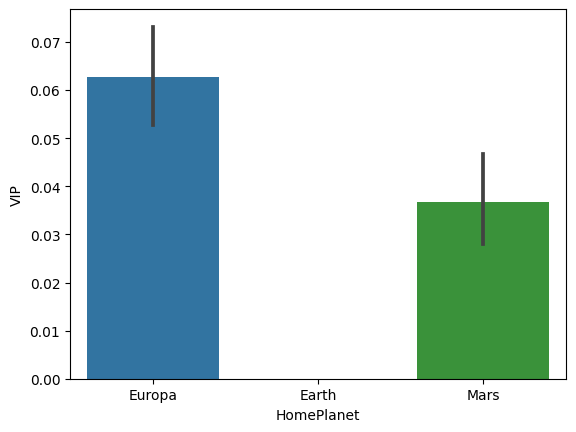

In [23]:
sns.barplot(data=data_new, x=data['HomePlanet'], y=data['VIP'])

<Axes: xlabel='Destination', ylabel='Age'>

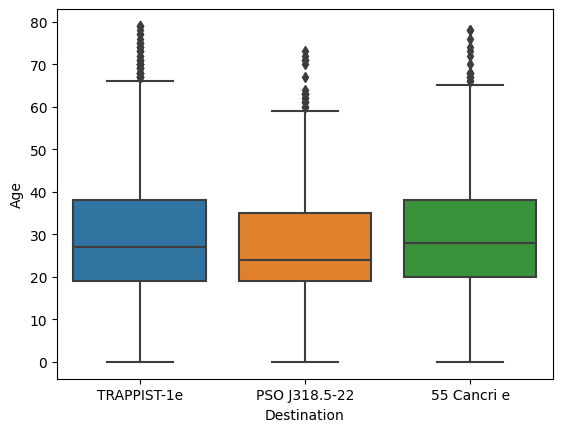

In [24]:
sns.boxplot(data=data_new, x=data_new['Destination'], y=data_new['Age'])

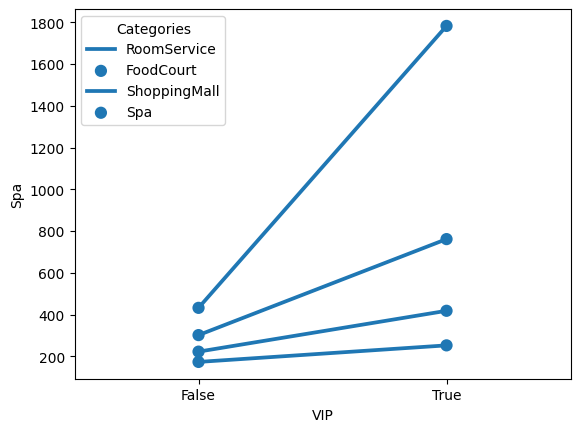

In [25]:
sns.pointplot(data=data_new, x='VIP', y='RoomService', ci=None)  # RoomService as y
sns.pointplot(data=data_new, x='VIP', y='FoodCourt', ci=None)    # FoodCourt as y
sns.pointplot(data=data_new, x='VIP', y='ShoppingMall', ci=None) # ShoppingMall as y
sns.pointplot(data=data_new, x='VIP', y='Spa', ci=None)          # Spa as y

plt.legend(title='Categories', labels=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa'])
plt.show()

<Axes: xlabel='Age', ylabel='RoomService'>

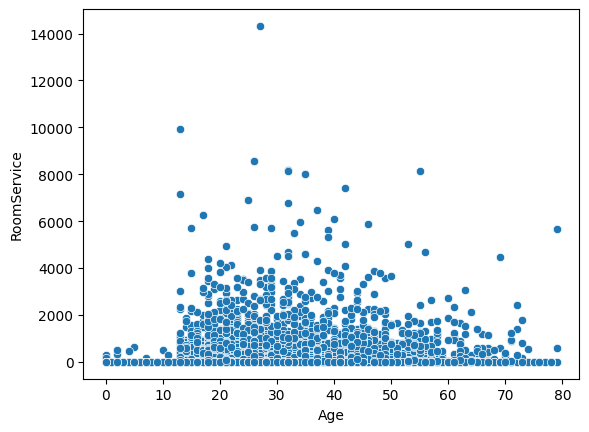

In [26]:
sns.scatterplot(data=data_new, x=data_new['Age'], y=data_new['RoomService'])

# Feature Engineering

In [27]:
# Data info
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7746 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7746 non-null   object 
 1   HomePlanet    7746 non-null   object 
 2   CryoSleep     7746 non-null   object 
 3   Cabin         7746 non-null   object 
 4   Destination   7746 non-null   object 
 5   Age           7746 non-null   float64
 6   VIP           7746 non-null   object 
 7   RoomService   7746 non-null   float64
 8   FoodCourt     7746 non-null   float64
 9   ShoppingMall  7746 non-null   float64
 10  Spa           7746 non-null   float64
 11  VRDeck        7746 non-null   float64
 12  Name          7571 non-null   object 
 13  Transported   7746 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 854.8+ KB


### Label Encoder

In [28]:
label_encoder = LabelEncoder()

In [29]:
data_new['HomePlanet'] = label_encoder.fit_transform(data_new['HomePlanet'])
data_new['CryoSleep'] = label_encoder.fit_transform(data_new['CryoSleep'])
data_new['Cabin'] = label_encoder.fit_transform(data_new['Cabin'])
data_new['VIP'] = label_encoder.fit_transform(data_new['VIP'])
data_new['Destination'] = label_encoder.fit_transform(data_new['Destination'])

# Model building

In [30]:
X = data_new.drop(['Transported','Name','PassengerId'], axis=1)

In [31]:
y = data_new['Transported']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [33]:
Decision_tree = DecisionTreeClassifier()

In [34]:
Decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
random_forest = RandomForestClassifier()

In [36]:
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
xgboost = XGBClassifier(n_estimators=100)

In [38]:
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
svm = SVC()

In [40]:
svm.fit(x_train, y_train)

SVC()

# Model Evaluation

### Decision Tree

In [41]:
# make predictions decision tree
y_pred_tree = Decision_tree.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_tree)

Accuracy: 0.7160068846815835


### Random forest

In [42]:
# make predictions using random forest model
y_pred_forest = random_forest.predict(x_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Accuracy:", accuracy_forest)

Accuracy: 0.7870051635111877


### Support vector machines

In [43]:
# make predictions using svm
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.7771084337349398


### Xgboost

In [44]:
# make predictions using xgboost
y_pred_xgboost = xgboost.predict(x_test)
accuracy_boost = accuracy_score(y_test, y_pred_xgboost)
print("Accuracy:", accuracy_boost)

Accuracy: 0.7844234079173839


## Classification report

In [45]:
forest_classification = classification_report(y_test, y_pred_forest)
tree_classification = classification_report(y_test, y_pred_tree)
svm_classification = classification_report(y_test, y_pred_svm)
xgboost_classification = classification_report(y_test, y_pred_xgboost)

In [46]:
print(f'Forest Classification: {forest_classification}')
print(f'Tree Classification: {tree_classification}')
print(f'Svm Classification: {svm_classification}')
print(f'XGBoost Classification: {xgboost_classification}')

Forest Classification:               precision    recall  f1-score   support

       False       0.78      0.80      0.79      1156
        True       0.79      0.78      0.79      1168

    accuracy                           0.79      2324
   macro avg       0.79      0.79      0.79      2324
weighted avg       0.79      0.79      0.79      2324

Tree Classification:               precision    recall  f1-score   support

       False       0.72      0.69      0.71      1156
        True       0.71      0.74      0.72      1168

    accuracy                           0.72      2324
   macro avg       0.72      0.72      0.72      2324
weighted avg       0.72      0.72      0.72      2324

Svm Classification:               precision    recall  f1-score   support

       False       0.86      0.66      0.75      1156
        True       0.73      0.89      0.80      1168

    accuracy                           0.78      2324
   macro avg       0.79      0.78      0.77      2324
weighted a

# Test csv

In [47]:
data_test = pd.read_csv('test.csv')

In [48]:
data_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [49]:
data_test.fillna(0, inplace=True)

In [50]:
data_test.drop(['Name','PassengerId'], axis=1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,0,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D/297/P,0,0.0,False,0.0,2680.0,0.0,0.0,523.0


In [52]:
data_test['HomePlanet'] = data_test['HomePlanet'].astype(str)
data_test['CryoSleep'] = data_test['CryoSleep'].astype(str)
data_test['Cabin'] = data_test['Cabin'].astype(str)
data_test['VIP'] = data_test['VIP'].astype(str)
data_test['Destination'] = data_test['Destination'].astype(str)

In [53]:
data_test['HomePlanet'] = label_encoder.fit_transform(data_test['HomePlanet'])
data_test['CryoSleep'] = label_encoder.fit_transform(data_test['CryoSleep'])
data_test['Cabin'] = label_encoder.fit_transform(data_test['Cabin'])
data_test['VIP'] = label_encoder.fit_transform(data_test['VIP'])
data_test['Destination'] = label_encoder.fit_transform(data_test['Destination'])

In [60]:
data_test.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [62]:
data_test = pd.get_dummies(data_test)
data_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,2,2785,3,27.0,1,0.0,0.0,0.0,0.0,0.0
1,1,1,1868,3,19.0,1,0.0,9.0,0.0,2823.0,0.0
2,2,2,258,1,31.0,1,0.0,0.0,0.0,0.0,0.0
3,2,1,260,3,38.0,1,0.0,6652.0,0.0,181.0,585.0
4,1,1,1941,3,20.0,1,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,1,2,2680,3,34.0,1,0.0,0.0,0.0,0.0,0.0
4273,1,1,0,3,42.0,1,0.0,847.0,17.0,10.0,144.0
4274,3,2,603,1,0.0,1,0.0,0.0,0.0,0.0,0.0
4275,2,1,604,0,0.0,1,0.0,2680.0,0.0,0.0,523.0


In [63]:
pred = random_forest.predict(data_test)

In [64]:
pred = pred.flatten()
pred

array([ True,  True,  True, ...,  True,  True,  True])

In [65]:
data_frame = pd.read_csv('test.csv')

In [66]:
pred2 = []

for i in pred:
    if i == 1:
        pred2.append(True)
    else:
        pred2.append(False)

In [69]:
output = pd.DataFrame({'PassengerId': data_frame['PassengerId'],
                        'Transported' : pred})

In [70]:
output['Transported'] = output['Transported'].apply(lambda x:True if x==1 else False)
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [71]:
output.to_csv('submission_new.csv', index=False)